In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv(r'F:/FinalProject/XYZCorp_LendingData.txt',delimiter='\t',parse_dates=["issue_d"])
data.head()

C:\Users\omkar\Anaconda3\anacon\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
print(data.shape)
print(data.dtypes)
print(data.describe())
print(data.isnull().sum())

(855969, 73)
id                                      int64
member_id                               int64
loan_amnt                             float64
funded_amnt                           float64
funded_amnt_inv                       float64
term                                   object
int_rate                              float64
installment                           float64
grade                                  object
sub_grade                              object
emp_title                              object
emp_length                             object
home_ownership                         object
annual_inc                            float64
verification_status                    object
issue_d                        datetime64[ns]
pymnt_plan                             object
desc                                   object
purpose                                object
title                                  object
zip_code                               object
addr_state           

In [10]:
df=pd.DataFrame(data)
df.dtypes

id                                      int64
member_id                               int64
loan_amnt                             float64
funded_amnt                           float64
funded_amnt_inv                       float64
term                                   object
int_rate                              float64
installment                           float64
grade                                  object
sub_grade                              object
emp_title                              object
emp_length                             object
home_ownership                         object
annual_inc                            float64
verification_status                    object
issue_d                        datetime64[ns]
pymnt_plan                             object
desc                                   object
purpose                                object
title                                  object
zip_code                               object
addr_state                        

In [11]:
half_count=len(df)/2
df1=df.dropna(thresh=half_count,axis=1)# del variable (axis=1)with >50% values as na
print(df1.isnull().sum())

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      49443
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             33
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
r

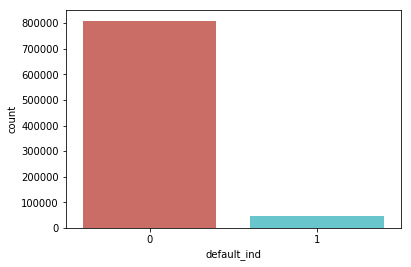

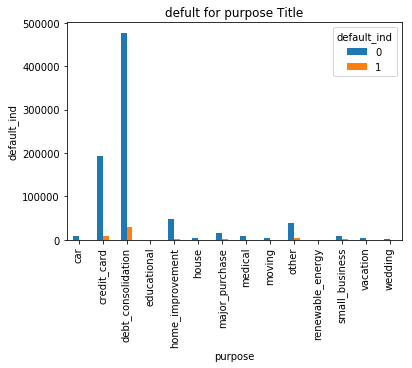

In [12]:
#%% barplot releation b/w some actual variales vs default_int

sns.countplot(x='default_ind',data=df1, palette='hls')
plt.show()
pd.crosstab(df1.purpose,df1.default_ind).plot(kind='bar')
plt.title('defult for purpose Title')
plt.xlabel('purpose')
plt.ylabel('default_ind')
plt.savefig('purpose')

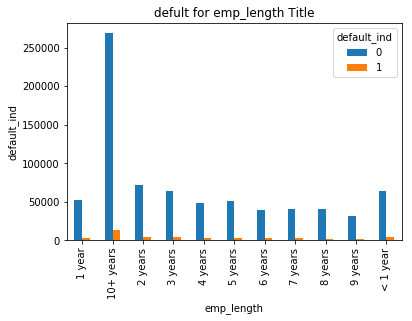

In [13]:
pd.crosstab(df1.emp_length,df1.default_ind).plot(kind='bar')

plt.title('defult for emp_length Title')
plt.xlabel('emp_length')
plt.ylabel('default_ind')
plt.savefig('emp_length')

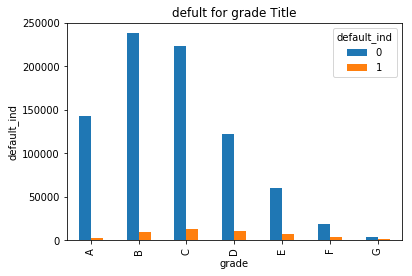

In [14]:
pd.crosstab(df1.grade,df1.default_ind).plot(kind='bar')

plt.title('defult for grade Title')
plt.xlabel('grade')
plt.ylabel('default_ind')
plt.savefig('grade')

In [15]:
#%% examine our dataframes correlation matrix and drop highly correlated/redundant data to address multicollinearity.
cor = df1.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
print(cor)
cor[(cor > 0.60) | (cor < -0.6)]

id           id                            0.000000
             member_id                     0.000000
             loan_amnt                     0.000000
             funded_amnt                   0.000000
             funded_amnt_inv               0.000000
             int_rate                      0.000000
             installment                   0.000000
             annual_inc                    0.000000
             dti                           0.000000
             delinq_2yrs                   0.000000
             inq_last_6mths                0.000000
             open_acc                      0.000000
             pub_rec                       0.000000
             revol_bal                     0.000000
             revol_util                    0.000000
             total_acc                     0.000000
             out_prncp                     0.000000
             out_prncp_inv                 0.000000
             total_pymnt                   0.000000
            

member_id                id                 0.999431
funded_amnt              loan_amnt          0.999265
funded_amnt_inv          loan_amnt          0.997601
                         funded_amnt        0.998485
installment              loan_amnt          0.944870
                         funded_amnt        0.945903
                         funded_amnt_inv    0.944149
total_acc                open_acc           0.694850
out_prncp                loan_amnt          0.639784
                         funded_amnt        0.641706
                         funded_amnt_inv    0.644011
out_prncp_inv            loan_amnt          0.639786
                         funded_amnt        0.641709
                         funded_amnt_inv    0.644023
                         out_prncp          0.999997
total_pymnt_inv          total_pymnt        0.998121
total_rec_prncp          total_pymnt        0.970594
                         total_pymnt_inv    0.968608
total_rec_int            total_pymnt        0.

In [16]:
df1.grade.value_counts()
grade_final={'A':6,'B':5,'C':4,'D':3,'E':2,'F':1,'G':0}
df1.grade=[grade_final[item]for item in df1.grade]
print(df1.grade)

0         5
1         4
2         4
3         4
4         5
5         6
6         4
7         2
8         1
9         5
10        4
11        5
12        4
13        5
14        5
15        3
16        4
17        6
18        5
19        6
20        4
21        5
22        5
23        5
24        5
25        5
26        4
27        3
28        5
29        5
         ..
855939    6
855940    4
855941    3
855942    5
855943    5
855944    3
855945    6
855946    3
855947    3
855948    3
855949    3
855950    5
855951    6
855952    6
855953    5
855954    6
855955    4
855956    3
855957    6
855958    4
855959    5
855960    5
855961    2
855962    5
855963    3
855964    5
855965    5
855966    3
855967    2
855968    5
Name: grade, Length: 855969, dtype: int64


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
df1.term.value_counts()
df1.term=df1.term.str.extract('(\d+)')
term_final={'36':0,'60':1}
df1.term=[term_final[item]for item in df1.term]
print(df1.term)

C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0         0
1         1
2         0
3         0
4         1
5         0
6         1
7         0
8         1
9         1
10        1
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        1
21        0
22        0
23        0
24        0
25        0
26        0
27        1
28        0
29        0
         ..
855939    0
855940    1
855941    0
855942    0
855943    1
855944    0
855945    0
855946    1
855947    1
855948    1
855949    1
855950    1
855951    0
855952    0
855953    0
855954    0
855955    0
855956    0
855957    0
855958    1
855959    0
855960    0
855961    0
855962    0
855963    0
855964    0
855965    0
855966    1
855967    1
855968    0
Name: term, Length: 855969, dtype: int64


In [18]:
df1['emp_length'].mode()[0]
df1['emp_length'].fillna(df1['emp_length'].mode()[0],inplace=True)
df1['emp_length'] = df1['emp_length'].str.replace('+','')
df1['emp_length'] = df1['emp_length'].str.replace('<','')
print(df1.emp_length)

C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\omkar\Anaconda3\anacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0         10 years
1           1 year
2         10 years
3         10 years
4           1 year
5          3 years
6          8 years
7          9 years
8          4 years
9           1 year
10         5 years
11        10 years
12          1 year
13         3 years
14         3 years
15          1 year
16         4 years
17        10 years
18          1 year
19         6 years
20         3 years
21        10 years
22        10 years
23         5 years
24          1 year
25         2 years
26         9 years
27         2 years
28        10 years
29          1 year
            ...   
855939     2 years
855940    10 years
855941    10 years
855942      1 year
855943     4 years
855944    10 years
855945    10 years
855946    10 years
855947    10 years
855948     3 years
855949    10 years
855950    10 years
855951    10 years
855952     9 years
855953     4 years
855954      1 year
855955    10 years
855956     2 years
855957      1 year
855958     8 years
855959    10 years
855960     8

C:\Users\omkar\Anaconda3\anacon\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
df1.emp_length=df1.emp_length.str.extract('(\d+)')
print(df1.emp_length)
df1.emp_length = [int(x) for x in df1.emp_length]
print(df1.emp_length.dtype)

C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0         10
1          1
2         10
3         10
4          1
5          3
6          8
7          9
8          4
9          1
10         5
11        10
12         1
13         3
14         3
15         1
16         4
17        10
18         1
19         6
20         3
21        10
22        10
23         5
24         1
25         2
26         9
27         2
28        10
29         1
          ..
855939     2
855940    10
855941    10
855942     1
855943     4
855944    10
855945    10
855946    10
855947    10
855948     3
855949    10
855950    10
855951    10
855952     9
855953     4
855954     1
855955    10
855956     2
855957     1
855958     8
855959    10
855960     8
855961    10
855962     1
855963    10
855964     8
855965    10
855966     5
855967     1
855968    10
Name: emp_length, Length: 855969, dtype: object
int64


In [20]:
print(df1['verification_status'].unique())
df1['verification_status'] = df1['verification_status'].str.replace('Source Verified','Verified')
print(df1.verification_status)
Ver_status={'Verified':1,'Not Verified':0}
df1.verification_status=[Ver_status[item]for item in df1.verification_status]
print(df1.verification_status)

['Verified' 'Source Verified' 'Not Verified']


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0             Verified
1             Verified
2         Not Verified
3             Verified
4             Verified
5             Verified
6         Not Verified
7             Verified
8             Verified
9             Verified
10        Not Verified
11            Verified
12            Verified
13            Verified
14            Verified
15        Not Verified
16        Not Verified
17        Not Verified
18            Verified
19        Not Verified
20            Verified
21            Verified
22            Verified
23        Not Verified
24        Not Verified
25            Verified
26        Not Verified
27        Not Verified
28        Not Verified
29            Verified
              ...     
855939        Verified
855940        Verified
855941        Verified
855942        Verified
855943        Verified
855944        Verified
855945        Verified
855946        Verified
855947        Verified
855948        Verified
855949    Not Verified
855950        Verified
855951     

C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [21]:
print(df1['application_type'].unique())
App_type={'INDIVIDUAL':1,'JOINT':2}
df1.application_type=[App_type[item] for item in df1.application_type]
print(df1.application_type)

['INDIVIDUAL' 'JOINT']
0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
855939    1
855940    1
855941    1
855942    1
855943    1
855944    1
855945    1
855946    1
855947    1
855948    1
855949    1
855950    1
855951    1
855952    1
855953    1
855954    1
855955    1
855956    1
855957    1
855958    1
855959    1
855960    1
855961    1
855962    1
855963    1
855964    1
855965    1
855966    1
855967    1
855968    1
Name: application_type, Length: 855969, dtype: int64


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
print(df1['initial_list_status'].unique())
list_status={'w':1,'f':2}
df1.initial_list_status=[list_status[item] for item in df1.initial_list_status]
print(df1.initial_list_status)

['f' 'w']
0         2
1         2
2         2
3         2
4         2
5         2
6         2
7         2
8         2
9         2
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
20        2
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
         ..
855939    2
855940    2
855941    2
855942    1
855943    1
855944    2
855945    2
855946    1
855947    1
855948    1
855949    2
855950    1
855951    2
855952    2
855953    2
855954    1
855955    1
855956    2
855957    1
855958    1
855959    2
855960    2
855961    2
855962    2
855963    2
855964    2
855965    2
855966    1
855967    1
855968    2
Name: initial_list_status, Length: 855969, dtype: int64


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
print(df1['purpose'].unique())
purpose_score={'vacation':0,'other':1,'major_purchase':2,'car':3,'wedding':4,'medical':5,'moving':6,'home_improvement':7,'credit_card':8,'debt_consolidation':9,'house':10,'small_business':11,'renewable_energy':12,'educational':13}
df1.purpose=[purpose_score[item] for item in df1.purpose]
print(df1.purpose)

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
0          8
1          3
2         11
3          1
4          1
5          4
6          9
7          3
8         11
9          1
10         9
11         9
12         9
13         8
14         1
15         9
16         7
17         2
18         5
19         9
20         9
21         9
22         8
23         9
24         2
25         8
26         9
27         1
28         9
29         8
          ..
855939     9
855940     9
855941     5
855942     9
855943     9
855944     9
855945     9
855946     8
855947     9
855948     9
855949     9
855950     9
855951     8
855952     9
855953     9
855954     9
855955     9
855956     9
855957     9
855958     2
855959     3
855960     9
855961     9
855962     8
855963     8
855964     9
855965     7
855966     9
855967     9
855968     8
Name: purpose, Lengt

C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [24]:
df1['earliest_cr_line'].nunique()
df1.earliest_cr_line=df1.earliest_cr_line.str.extract('(\d+)')
print(df1.earliest_cr_line)
df1.earliest_cr_line = [int(x) for x in df1.earliest_cr_line]
print(df1.earliest_cr_line.dtype)

C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0         1985
1         1999
2         2001
3         1996
4         1996
5         2004
6         2005
7         2007
8         2004
9         2004
10        1998
11        1989
12        2004
13        2003
14        1991
15        2007
16        1998
17        1993
18        2003
19        2001
20        1997
21        1983
22        1985
23        2003
24        2001
25        2002
26        2003
27        2003
28        1984
29        2006
          ... 
855939    1998
855940    2002
855941    1990
855942    2006
855943    1989
855944    2001
855945    1993
855946    1994
855947    2002
855948    2003
855949    2003
855950    1983
855951    1994
855952    2003
855953    2006
855954    1975
855955    2006
855956    2011
855957    2000
855958    1994
855959    2002
855960    1994
855961    2002
855962    1995
855963    1999
855964    2004
855965    1974
855966    2003
855967    2003
855968    2001
Name: earliest_cr_line, Length: 855969, dtype: object
int64


In [28]:
def earliest_cr_line_final(i):
    if i in range(44,79):
        return(0)
    elif i in range(80,90):
        return(1)
    elif i in range(90,0):
        return(2)
    else:
        return(3)

In [27]:
df1['earliest_cr_line']= df1['earliest_cr_line'].apply(earliest_cr_line_final)
print(df1.earliest_cr_line)

0         3
1         3
2         3
3         3
4         3
5         3
6         3
7         3
8         3
9         3
10        3
11        3
12        3
13        3
14        3
15        3
16        3
17        3
18        3
19        3
20        3
21        3
22        3
23        3
24        3
25        3
26        3
27        3
28        3
29        3
         ..
855939    3
855940    3
855941    3
855942    3
855943    3
855944    3
855945    3
855946    3
855947    3
855948    3
855949    3
855950    3
855951    3
855952    3
855953    3
855954    3
855955    3
855956    3
855957    3
855958    3
855959    3
855960    3
855961    3
855962    3
855963    3
855964    3
855965    3
855966    3
855967    3
855968    3
Name: earliest_cr_line, Length: 855969, dtype: int64


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df1.open_acc.mode()

0    9.0
dtype: float64

In [30]:
def open_acc_final(i):
    if i in range (4,23):
        return(1)
    else:
        return(0)

In [31]:
df1['open_acc']= df1['open_acc'].apply(open_acc_final)
print(df1.open_acc) 

0         0
1         0
2         0
3         1
4         1
5         1
6         1
7         1
8         1
9         0
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
855939    1
855940    1
855941    1
855942    1
855943    1
855944    1
855945    1
855946    1
855947    1
855948    1
855949    1
855950    1
855951    1
855952    1
855953    1
855954    1
855955    1
855956    0
855957    1
855958    0
855959    1
855960    1
855961    1
855962    1
855963    1
855964    1
855965    1
855966    1
855967    1
855968    1
Name: open_acc, Length: 855969, dtype: int64


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df1.revol_util.describe()
print(df1.revol_util.isnull().sum())
df1['revol_util'].fillna(df1['revol_util'].median(),inplace=True)

446


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
print(df1['home_ownership'].unique())
home_ownership_score={'NONE':0,'ANY':0,'OTHER':0,'RENT':1,'MORTGAGE':2,'OWN':3}
df1.home_ownership=[home_ownership_score[item]for item in df1.home_ownership]
print(df1.home_ownership)

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         3
9         1
10        3
11        3
12        1
13        1
14        1
15        1
16        1
17        2
18        2
19        1
20        1
21        1
22        3
23        1
24        1
25        2
26        1
27        1
28        2
29        1
         ..
855939    2
855940    1
855941    2
855942    1
855943    1
855944    2
855945    1
855946    2
855947    1
855948    1
855949    3
855950    2
855951    2
855952    2
855953    1
855954    1
855955    1
855956    1
855957    1
855958    2
855959    2
855960    1
855961    3
855962    2
855963    1
855964    1
855965    2
855966    1
855967    1
855968    1
Name: home_ownership, Length: 855969, dtype: int64


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
df1['last_pymnt_d'].fillna(df1['last_pymnt_d'].mode()[0],inplace=True)
df1.last_pymnt_d=df1.last_pymnt_d.str.extract('(\d+)')
print(df1.last_pymnt_d)
df1.last_pymnt_d = [int(x) for x in df1.last_pymnt_d]
print(df1.last_pymnt_d.dtype)

C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0         2015
1         2013
2         2014
3         2015
4         2016
5         2015
6         2016
7         2015
8         2012
9         2012
10        2013
11        2013
12        2012
13        2015
14        2013
15        2015
16        2015
17        2013
18        2015
19        2012
20        2015
21        2013
22        2015
23        2013
24        2012
25        2012
26        2016
27        2012
28        2013
29        2014
          ... 
855939    2016
855940    2016
855941    2015
855942    2016
855943    2016
855944    2016
855945    2016
855946    2016
855947    2016
855948    2016
855949    2016
855950    2016
855951    2016
855952    2016
855953    2016
855954    2015
855955    2016
855956    2015
855957    2016
855958    2016
855959    2015
855960    2016
855961    2015
855962    2016
855963    2016
855964    2016
855965    2016
855966    2016
855967    2016
855968    2016
Name: last_pymnt_d, Length: 855969, dtype: object
int64


In [35]:
def last_pymnt_d_final(i):
    if i in range (8,10):
        return(0)
    elif i in range(11,13):
        return(1)    
    else:
        return(2)
df1['last_pymnt_d']= df1['last_pymnt_d'].apply(last_pymnt_d_final)
print(df1.last_pymnt_d) 

0         2
1         2
2         2
3         2
4         2
5         2
6         2
7         2
8         2
9         2
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
20        2
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
         ..
855939    2
855940    2
855941    2
855942    2
855943    2
855944    2
855945    2
855946    2
855947    2
855948    2
855949    2
855950    2
855951    2
855952    2
855953    2
855954    2
855955    2
855956    2
855957    2
855958    2
855959    2
855960    2
855961    2
855962    2
855963    2
855964    2
855965    2
855966    2
855967    2
855968    2
Name: last_pymnt_d, Length: 855969, dtype: int64


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
df2=pd.DataFrame(df1)
df2.drop(['member_id','funded_amnt','addr_state','emp_title','sub_grade','inq_last_6mths','funded_amnt_inv','pymnt_plan','title','zip_code','inq_last_6mths','total_acc','out_prncp_inv','total_pymnt_inv','next_pymnt_d','policy_code','tot_coll_amt'],axis=1,inplace=True)
df2.shape
df2.isnull().sum()

id                                0
loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
purpose                           0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
initial_list_status               0
out_prncp                         0
total_pymnt                       0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_d                

In [37]:
print(df2.tot_cur_bal.isnull().sum())
print(df2.total_rev_hi_lim.isnull().sum())

67313
67313


In [39]:
df3=df2.dropna(axis=0,how='any',thresh=None)

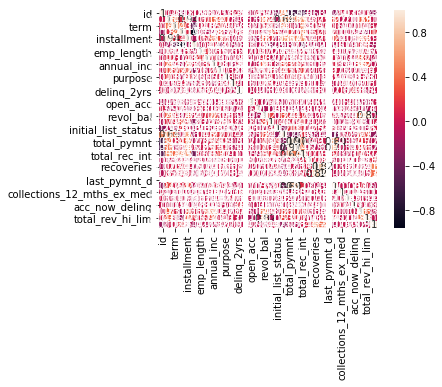

In [40]:
#%%check heatmap 
#correlation matrix
corrmat = df3.corr()
sns.heatmap(corrmat, vmax=1, square=True,annot=True);

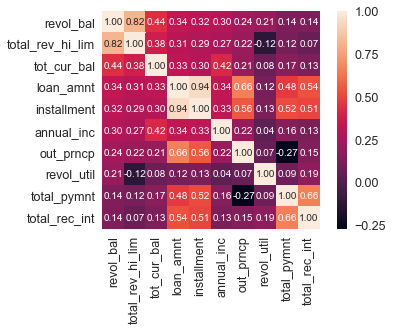

In [41]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k,'revol_bal')['revol_bal'].index
cm = np.corrcoef(df3[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [42]:
print(df3['last_credit_pull_d'].unique())
print(df3.last_credit_pull_d.isnull().sum())
df3.last_credit_pull_d=df3.last_credit_pull_d.str.extract('(\d+)')
print(df3.last_credit_pull_d)

['Dec-2015' 'Jan-2016' 'Aug-2014' 'Aug-2015' 'May-2014' 'Mar-2015'
 'Mar-2014' 'Jan-2014' 'May-2015' 'Oct-2015' 'Nov-2015' 'Oct-2014'
 'Apr-2014' 'Jul-2015' 'Apr-2015' 'Sep-2014' 'Sep-2015' 'Dec-2014'
 'Nov-2014' 'Jan-2015' 'Jun-2015' 'Jul-2014' 'Feb-2014' 'Jun-2014'
 'Feb-2015' 'Nov-2013' 'Dec-2013' 'Oct-2013' 'Sep-2013' 'Aug-2013'
 'Jul-2013' 'Jun-2013' 'May-2013' 'Apr-2013' 'Mar-2013' 'Feb-2013'
 'Jan-2013' 'Dec-2012' 'Nov-2012' 'Oct-2012' 'Sep-2012' 'Aug-2012']
0
39694     2015
39695     2016
39696     2016
39697     2016
39698     2016
39699     2016
39700     2016
39701     2016
39702     2016
39703     2016
39704     2016
39705     2014
39706     2016
39707     2016
39708     2015
39709     2016
39710     2016
39711     2016
39712     2016
39713     2016
39714     2016
39715     2016
39716     2016
39717     2016
39718     2015
39719     2016
39720     2016
39721     2016
39722     2014
39723     2016
          ... 
855939    2016
855940    2016
855941    2016
855942    2016
855

C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [43]:
df3.last_credit_pull_d = [int(x) for x in df3.last_credit_pull_d]
print(df3.last_credit_pull_d.dtype)

int64


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [47]:
def last__credit_pull_d_final(i):
    if i in range (14,16):
        return(0)
    else:
        return(1)

In [46]:
df3['last_credit_pull_d']= df3['last_credit_pull_d'].apply(last__credit_pull_d_final)
print(df3.last_credit_pull_d) 

39694     1
39695     1
39696     1
39697     1
39698     1
39699     1
39700     1
39701     1
39702     1
39703     1
39704     1
39705     1
39706     1
39707     1
39708     1
39709     1
39710     1
39711     1
39712     1
39713     1
39714     1
39715     1
39716     1
39717     1
39718     1
39719     1
39720     1
39721     1
39722     1
39723     1
         ..
855939    1
855940    1
855941    1
855942    1
855943    1
855944    1
855945    1
855946    1
855947    1
855948    1
855949    1
855950    1
855951    1
855952    1
855953    1
855954    1
855955    1
855956    1
855957    1
855958    1
855959    1
855960    1
855961    1
855962    1
855963    1
855964    1
855965    1
855966    1
855967    1
855968    1
Name: last_credit_pull_d, Length: 788608, dtype: int64


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
print(df3['pub_rec'].unique())
df3.pub_rec.isnull().sum()

[ 0.  2.  1.  3.  4.  5.  6.  9.  8.  7. 11. 49. 10. 54. 12. 18. 19. 16.
 15. 14. 40. 63. 13. 21. 34. 17. 23. 26. 28. 86. 22.]


0

In [49]:
def pub_rec_final(i):
    if i == 0:
        return(4)
    elif i == 1:
        return(3)
    elif i == 2:
        return(2)
    elif i == 3:
        return(1)
    else:
        return(0)
df3['pub_rec']= df3['pub_rec'].apply(pub_rec_final)
print(df3.pub_rec) 

39694     4
39695     4
39696     4
39697     2
39698     4
39699     4
39700     3
39701     4
39702     4
39703     2
39704     4
39705     4
39706     4
39707     4
39708     4
39709     4
39710     4
39711     4
39712     4
39713     4
39714     3
39715     4
39716     3
39717     3
39718     3
39719     4
39720     4
39721     4
39722     4
39723     4
         ..
855939    4
855940    4
855941    4
855942    4
855943    4
855944    4
855945    4
855946    4
855947    4
855948    4
855949    4
855950    4
855951    4
855952    4
855953    4
855954    4
855955    2
855956    4
855957    4
855958    4
855959    3
855960    3
855961    4
855962    4
855963    4
855964    3
855965    4
855966    3
855967    4
855968    3
Name: pub_rec, Length: 788608, dtype: int64


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [50]:
df3.delinq_2yrs.isnull().sum()

0

In [51]:
def delinq_2yrs_final(i):
    if i == 0:
        return(4)
    elif i == 1:
        return(3)
    elif i == 2:
        return(2)
    elif i == 3:
        return(1)
    else:
        return(0)
df3['delinq_2yrs']= df3['delinq_2yrs'].apply(delinq_2yrs_final)
print(df3.delinq_2yrs)

39694     4
39695     4
39696     4
39697     4
39698     4
39699     4
39700     3
39701     4
39702     2
39703     4
39704     4
39705     4
39706     3
39707     3
39708     4
39709     4
39710     4
39711     4
39712     4
39713     4
39714     4
39715     3
39716     4
39717     4
39718     3
39719     4
39720     4
39721     4
39722     4
39723     4
         ..
855939    4
855940    3
855941    4
855942    4
855943    4
855944    4
855945    4
855946    4
855947    4
855948    4
855949    4
855950    3
855951    4
855952    4
855953    3
855954    3
855955    2
855956    4
855957    4
855958    4
855959    4
855960    4
855961    4
855962    3
855963    4
855964    4
855965    4
855966    4
855967    3
855968    4
Name: delinq_2yrs, Length: 788608, dtype: int64


C:\Users\omkar\Anaconda3\anacon\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788608 entries, 39694 to 855968
Data columns (total 36 columns):
id                            788608 non-null int64
loan_amnt                     788608 non-null float64
term                          788608 non-null int64
int_rate                      788608 non-null float64
installment                   788608 non-null float64
grade                         788608 non-null int64
emp_length                    788608 non-null int64
home_ownership                788608 non-null int64
annual_inc                    788608 non-null float64
verification_status           788608 non-null int64
issue_d                       788608 non-null datetime64[ns]
purpose                       788608 non-null int64
dti                           788608 non-null float64
delinq_2yrs                   788608 non-null int64
earliest_cr_line              788608 non-null int64
open_acc                      788608 non-null int64
pub_rec                       7886

In [53]:
#%%split train and test data with issue_d date.( Train < 2015-06-01,test>= 2015-06-01)
df3.issue_d
train_data=df3[df3['issue_d']<'2015-06-01']
test_data=df3[df3['issue_d']>='2015-06-01']
train_data.shape
test_data.shape

(256984, 36)

In [54]:
train_data=train_data.drop('issue_d',axis=1)
test_data=test_data.drop('issue_d',axis=1)

In [56]:
#creating training and testing datasets
X_train=train_data.values[:,1:-1]
Y_train=train_data.values[:,-1]

In [58]:
X_test=test_data.values[:,1:-1]
Y_test=test_data.values[:,-1]

In [59]:
from sklearn.linear_model import LogisticRegression
LR = (LogisticRegression())
LR.fit(X_train, Y_train)
Y_pred=LR.predict(X_test)

In [60]:
# evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[256639     34]
 [    63    248]]
Classification report:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    256673
        1.0       0.88      0.80      0.84       311

avg / total       1.00      1.00      1.00    256984

Accuracy of the model: 0.999622544594216


In [61]:
#store the prediction probability
y_pred_prob=LR.predict_proba(X_test)
print(y_pred_prob)

[[9.99961536e-01 3.84641609e-05]
 [9.99716857e-01 2.83143410e-04]
 [9.92283060e-01 7.71694026e-03]
 ...
 [9.99922639e-01 7.73610662e-05]
 [9.99823701e-01 1.76298511e-04]
 [9.99998804e-01 1.19598774e-06]]


In [63]:
y_pred_class=[]
for value in y_pred_prob[:,0]:
    if value < 0.70:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score

cfm=confusion_matrix(Y_test.tolist(),y_pred_class)
print(cfm)
acc=accuracy_score(Y_test.tolist(),y_pred_class)

print("Accuracy of the model: ", acc)
print(classification_report(Y_test.tolist(),y_pred_class)) 

[[256620     53]
 [    63    248]]
Accuracy of the model:  0.9995486100301965
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00    256673
        1.0       0.82      0.80      0.81       311

avg / total       1.00      1.00      1.00    256984



In [65]:
#running for loop for treshold

for a in np.arange(0,1,0.05):

    predict_mine=np.where(y_pred_prob[:,0] < a, 1 ,0)
cfm=confusion_matrix(Y_test.tolist(),predict_mine)
total_err=cfm[0,1]+cfm[1,0] 
print("erros at threshold ",a,":",total_err,",type 2 error :", cfm[1,0],"type 1 error :")

erros at threshold  0.9500000000000001 : 6987 ,type 2 error : 60 type 1 error :


In [66]:
#%% AUC checking
from sklearn import metrics
fpr, tpr,threshold = metrics.roc_curve(Y_test.tolist(),y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)

0.8986105821608971


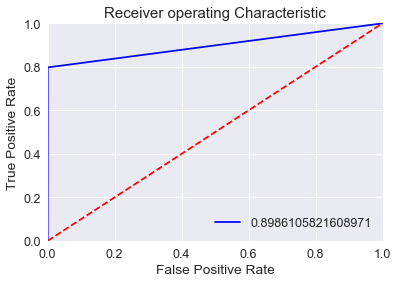

In [67]:
#%% plot Receiver operating Characteristic(ROC)

plt.title('Receiver operating Characteristic')
plt.plot(fpr, tpr,'b',label = auc) 
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [69]:
# predicting using the extratreesclassifier
from sklearn.ensemble import ExtraTreesClassifier
model=(ExtraTreesClassifier(51))
#fit the model on data and predict values
model=model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [70]:
#%%
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[185908  70765]
 [    16    295]]
0.724570401270118
             precision    recall  f1-score   support

        0.0       1.00      0.72      0.84    256673
        1.0       0.00      0.95      0.01       311

avg / total       1.00      0.72      0.84    256984



In [71]:
#%% AUC checking
from sklearn import metrics
fpr, tpr,threshold = metrics.roc_curve(Y_test.tolist(),y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)

0.8986105821608971


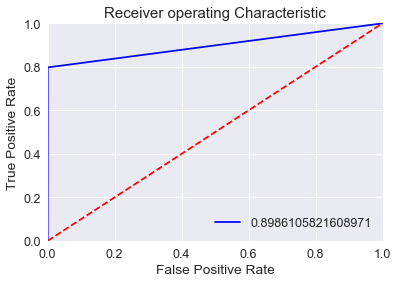

In [72]:
#%% plot Receiver operating Characteristic(ROC) model 2 extra tree classifier

plt.title('Receiver operating Characteristic')
plt.plot(fpr, tpr,'b',label = auc) 
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()